In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as TTS ,cross_val_score as CSV
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn

    0   1
0  40   3
1   5  17


Text(0.5, 15.0, 'Predict Value')

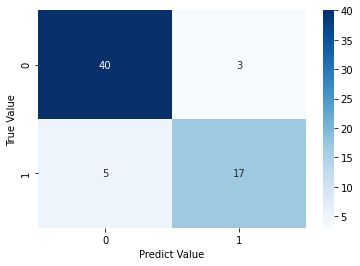

In [3]:
df =pd.read_csv('RFC_data.csv')
N =6
X = df.iloc[:,1:N]
y = df.iloc[:,16]
X_train,X_test,y_train,y_test = TTS (
    X,y,test_size = 0.15,random_state = 9,stratify = y)

RF = RF = make_pipeline(make_union(make_union(StackingEstimator(estimator=RandomForestClassifier(max_depth=4, max_features=0.2, min_samples_leaf=4, min_samples_split=9, n_estimators=11, random_state=8)),
            FunctionTransformer(copy)),
                make_union(FunctionTransformer(copy),FunctionTransformer(copy))),RandomForestClassifier(max_depth=6, max_features=0.3, min_samples_leaf=5, min_samples_split=13, n_estimators=21, random_state=10))
RF.fit(X_train, y_train)

y_pred = RF.predict(X)
con=confusion_matrix(y,y_pred)
con = pd.DataFrame(con)
print(con)
#xticks = ['Insensitive to ${NO_2}$','Sensitive to ${NO_2}$']
#yticks = ['Insensitive to ${NO_2}$','Sensitive to ${NO_2}$']
shp = sn.heatmap(con,annot=True,cmap='Blues')
                 #,xticklabels=xticks,yticklabels=yticks)
shp.set_ylabel('True Value')
shp.set_xlabel('Predict Value')